# Level 1

## Exercise 1

Import the sprint10.xlsx file as a DataFrame. Make sure the file is imported correctly, with the corresponding column names, without manipulating the original file.

Sort the DataFrame by country of origin. In case of a tie, sort by city name.

Show the first 10 rows.

Additionally, take a printout to verify that the DNI only has unique values.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('sprint10.xlsx', skiprows= 3, index_col=0)

In [ ]:
df = df.sort_values(by=["País d'origen", "Ciutat"])

In [ ]:
df.head(10)

In [ ]:
df_cleaned = df.drop_duplicates(subset=["DNI"])

df_cleaned.head(5)

## Exercise 2

Create a column that is the full name.

Create a column if the person was born in Spain or not.

Put the ID as the index of the DataFrame (row names).

Replace the name of the columns Day of Birth, Month of Birth and Year of Birth with Day, Month and Year.

Replace H with Male, D with Female, A with Other and NC with a missing data (nan/null/na).

Show all the changes you've made in a single table.

In [ ]:
df["full_name"] = df["Nom"] + " " + df["Cognoms"]

In [ ]:
df["born_spain"] = np.where(df["País d'origen"] == "Espanya", True, False)

In [ ]:
df.set_index("DNI", inplace=True)

In [ ]:
df.rename(columns={'Dia de Naixement': 'Dia', 'Mes de Naixement': 'Mes', 'Any de Naixement': 'Any'}, inplace=True)

In [ ]:
def replace_sex(x):
    x = str(x).strip().upper()
    if x == "H":
        x="Home"
        return x
    elif x =="D":
        x="Dona"
        return x
    elif x=="A":
        x = "Alteres"
        return x
    else:
        x = "NC"
        return x

In [ ]:
df["Gènere"] = df["Gènere"].apply(replace_sex)

In [ ]:
df.head(5)

## Exercise 3

Merge the Children and Not Children columns into a single column, using the .apply() method and defining a function that solves the problem. The new column should be called "Children" and take the values ​​"Yes" or "No".

In [ ]:
mdf = df.copy()

In [ ]:
def have_kids(x):
    if x ==1.0:
        kids = "Yes"
    else:
        kids = "No"
    return kids

In [ ]:
mdf["Fills"] = mdf["Fills"].apply(have_kids)
mdf = mdf.drop('No Fills', axis=1)

In [ ]:
mdf.head(5)

## Exercise 4

Create a summary table that allows you to see the average, median, minimum and maximum salary by Gender.

Sort the table based on average salary.

In [ ]:
new_df = mdf.copy()

In [ ]:
new_df["Salari mensual"] = new_df["Salari mensual"].astype(str).replace("€","", regex=True).replace("\.","", regex=True).astype(int)
new_df2 = new_df.groupby("Gènere").agg({'Salari mensual': ['mean','median', 'min', 'max']})
new_df2 = new_df2.round(2)
new_df2

## Exercise 5

Create a summary table with the average salary by gender (rows) and country of origin (columns).

Add the averages to the margins of the table.

(EXTRA): Apply conditional formatting to the table to see the highest values ​​in a more intense color

In [ ]:
new_df3 = pd.crosstab(new_df["Gènere"], new_df["País d'origen"], values=new_df["Salari mensual"], aggfunc='mean', margins=True)

In [ ]:
new_df3 = new_df3.style.format('{0:.2f}€')

In [ ]:
#new_df3.highlight_max(color='yellow')  
new_df3.background_gradient(cmap='Greens')

## Exercise 6

Create a new column that is the date of birth in Datetime format from the day, month and year columns. Using this column create a function that, given a date, calculates your current age as of today.

Use the function you just created to generate a new column in the DataFrame with the current age.

In [ ]:
from datetime import date

In [ ]:
new_df4 = mdf.copy()

In [ ]:
datess = pd.DataFrame({'year': new_df4["Any"] ,
                   'month': new_df4["Mes"],
                   'day': new_df4["Dia"]})

In [ ]:
new_df4["date_of_birth"] = pd.to_datetime(datess)

In [ ]:
def age_calculator(date_of_born):
    today = date.today()
    age = today.year - date_of_born.year - ((today.month, today.day) < (date_of_born.month, date_of_born.day))
    return age

In [ ]:
new_df4["Age"] = new_df4["date_of_birth"].apply(age_calculator)

In [ ]:
new_df4.head(5)

# Level 2

## Exercise 1

Using the following DataFrame, append the "Increment" column to the dataframe of the previous level.

Update the salary column based on the percentages attached. Don't manually modify the increments, write Python code to do the necessary conversions.

In [ ]:
df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D" ] , "Increment":

["5%","3,5%","2%","8%"]})

In [ ]:
df_increment

In [ ]:
new_df5 = new_df4.copy()

In [ ]:
new_df6 = pd.merge(new_df5, df_increment, left_on = "Grup Professional", right_on = "Grup").set_index(new_df5.index)

In [ ]:
new_df6 = new_df6.drop('Grup', axis=1)

In [ ]:
new_df6["New Salary"] = (new_df6["Salari mensual"].astype(str).replace("€","", regex=True).replace("\.","", regex=True).astype(float)) * ((new_df6["Increment"].astype(str).replace("%","", regex=True).replace("\,",".", regex=True).astype(float))/100) + (new_df6["Salari mensual"].astype(str).replace("€","", regex=True).replace("\.","", regex=True).astype(float)) 

In [ ]:
#new_df6["New Salary"] = new_df6["Increment"].astype(str).replace("%","", regex=True).replace("\,",".", regex=True).astype(float)

In [ ]:
new_df6.head(5).style.format({'New Salary':'{0:.2f}€'})

## Exercise 2

Using a loop, export the data for each Professional Group into 4 files (.xlsx or .csv format).

For example: "data_GroupA.xlsx", "data_GroupB.xlsx" ...

Export a 5th DataFrame in .xlsx or .csv format that contains how many workers there are for each Professional Group, what their average salary is, and what their median age is.

In [ ]:
new_df7 = new_df6.copy()

In [ ]:
new_df7.head(5)

In [ ]:
groups = []
for index, row in new_df7.iterrows():
    a = row.to_dict()
    a["DNI"] = index
    group = (row['Grup Professional'])
    new_df_name = 'df_'+group
    new_df_name = new_df_name.replace(' ', '')

    if new_df_name in groups:
        exec(f'{new_df_name}.loc[len({new_df_name})] = a') 
    else:
        groups.append(new_df_name)
        exec(f'{new_df_name} = pd.DataFrame([a])')

a = f'You are about to create {len(groups)} files. Press: \n1 to confirm \n2 to abort\nWaiting entry:'
confirmation = input(a)

if confirmation == '1':
    for item in groups:
        exec(f'{item}.set_index("DNI", inplace=True)')
        file_name = item+'.xlsx'
        exec(f'{item}.to_excel(file_name)')
    print("Files created successfully!")
else:
    print("The files have been not created!")

In [ ]:
df_GrupA.head(5)

In [ ]:
new_df8 = new_df7.copy()

In [ ]:
new_df9 = new_df8.groupby("Grup Professional")[["Grup Professional", "New Salary","Age"]].agg({"Grup Professional": "count","New Salary": "mean","Age": "median"})

In [ ]:
new_df9 = new_df9.round(2)

In [ ]:
new_df9 = new_df9.rename(columns = {"Grup Professional":"Count","New Salary":"AVG Salary","Age":"Median Age" })

In [ ]:
file_name1 = "count_groups.xlsx"
new_df9.to_excel(file_name1)

# Level 3

## Exercise 1

Create a function that takes a dataframe as an input parameter.

The function should automatically create (and export) a chart for each column in the dataframe. For example:

a histogram/boxplot if the variable is numeric
some bars of the most frequent values ​​if it is categorical
some bars of the most frequent years if the data is in date format.
The idea is to create a function that works for any dataframe, not just the one we've worked with so far.

Show the result of the function on one of the example datasets contained in the seaborn package. For example, iris , penguins or titanic .

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
from pandas.api.types import is_categorical_dtype

In [1759]:
new_df10 = sns.load_dataset("penguins")
#new_df10 = sns.load_dataset("tips")
#new_df10 = sns.load_dataset("titanic")
#new_df10 = sns.load_dataset("iris")

In [1764]:
def graph_generator3(df_data_frame):
    plot_list=[]
    for column in df_data_frame:
        
        fig = plt.figure(figsize=(7, 3.5))
        
        #Numeric
        if is_numeric_dtype(df_data_frame[column].dtypes):
            counts = df_data_frame[column].value_counts(dropna=True)
            x = counts.index.tolist()
            y = counts.values.tolist()
            if len(x) <= 2:
                df_data_frame.groupby([column])[column].count().plot.pie()
            elif len(x) >2 and len(x) <10:
                df_data_frame[column].plot.hist()
                
            else:
                df_data_frame[column].plot.box()

        #String or Category
        if is_string_dtype(df_data_frame[column].dtypes) or isinstance(df_data_frame[column].dtype, pd.CategoricalDtype):
            df_data_frame[column].value_counts().plot.bar()
        #Add a title to the plot 
        plt.title(column.upper())
        #Add to the list of plots
        plot_list.append(fig)


    filename = "multi_plot_image2.pdf"
    p = PdfPages(filename)

    for item in plot_list:
        plt.show()
        item.savefig(p, format='pdf')
        plt.close(fig)
    p.close() 

    #return plot_list


        
        

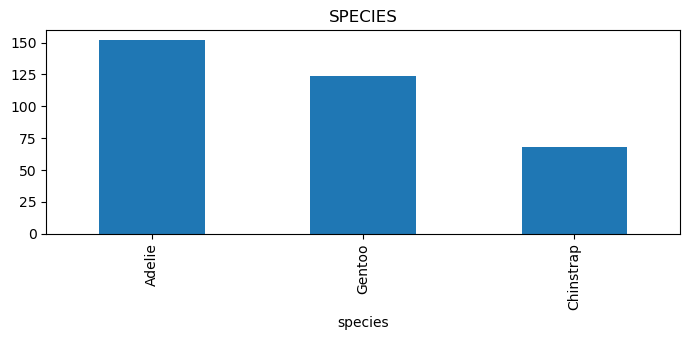

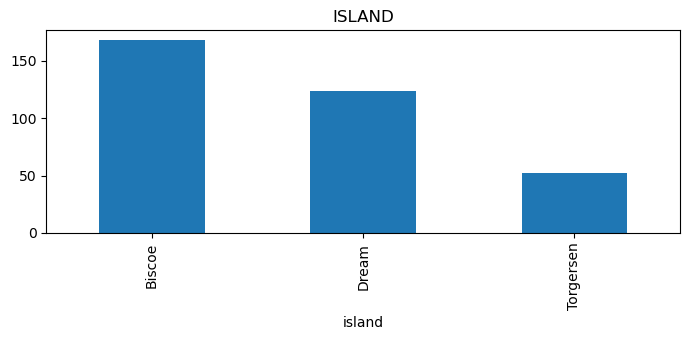

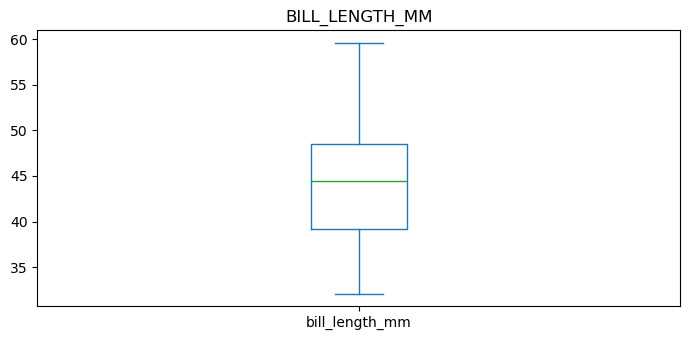

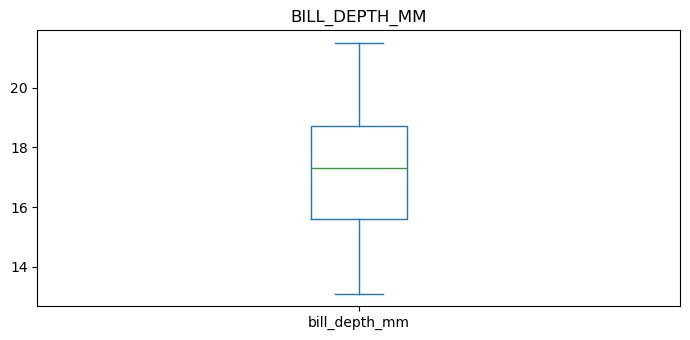

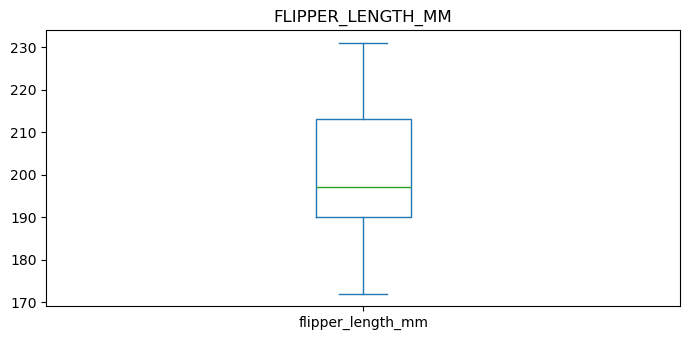

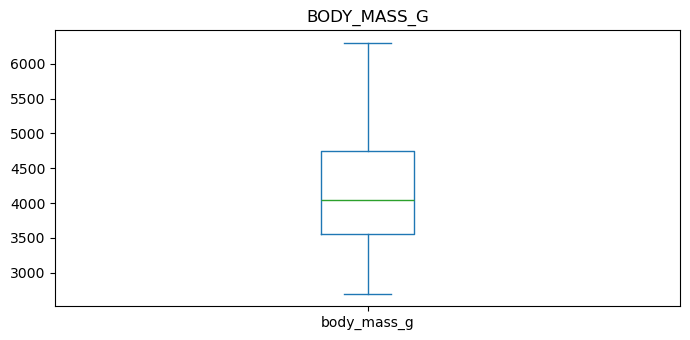

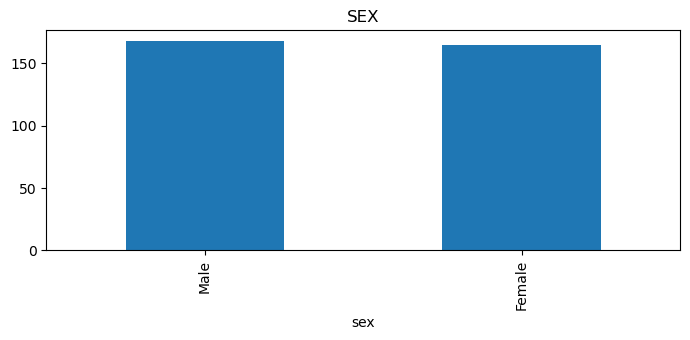

[<Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>]

In [1763]:
graph_generator3(new_df10)

## Exercise 2

Load the file matriu_distancies.xlsx into pandas, so that the row names and column names are those of the cities. Delete "Las Palmas de Gran Canaria" and "Palma" so that we can make the trip by car.

Source: Best Routes

We are interested in visiting all the main cities in Spain while traveling the shortest possible distance.

You don't have to do it optimally, we are interested in you developing a reasonable solution using the tools you currently have.

For example, a simple (but not optimal) approach would be to always go to the nearest city that we haven't visited yet.

Make a function that, given the distance matrix and the origin city, proposes a route that is as short as possible, returning a list with the order of visits. Also give the total distance traveled.

(EXTRA) From which city would the route be shortest with the proposed algorithm?

In [1678]:
import pandas as pd
import numpy as np

In [1679]:
new_df11 = pd.read_excel('matriu_distancies.xlsx')

In [1680]:
new_df11 = new_df11.drop(columns = ['Palma','Las Palmas de Gran Canaria'])

In [1681]:
new_df11.rename(columns={new_df11.columns[0]: "Ciudad"},inplace=True)

In [1684]:
new_df12 = new_df11.set_index("Ciudad")

In [1685]:
new_df12.drop(["Palma", "Las Palmas de Gran Canaria"], inplace=True)

In [1686]:
def route_calculator1(city):
    route = [city]
    distances = []
    new_df13 = new_df12.copy()

    while len(new_df13.columns) >1:
        a = new_df13.loc[city]
        distance = a.min()
        next_city = a.idxmin()
        route.append(next_city)
        distances.append(distance)
        
        new_df13 = new_df13.drop(columns=city)
        city = next_city

    total_distance = sum(distances)

    return route, total_distance

In [1687]:
route_calculator1("Barcelona")

(['Barcelona',
  'Hospitalet de Llobregat',
  'Zaragoza',
  'Valencia',
  'Alicante',
  'Murcia',
  'Córdoba',
  'Sevilla',
  'Málaga',
  'Valladolid',
  'Gijón',
  'Bilbao',
  'Vigo'],
 2778.0)